In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

In [2]:
trade_events = list()
with open('trade_events.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            trade_events.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are bird_index, bird_id, price, block, time
Processed 2128 lines.


In [3]:
for x in trade_events:
    if x[4][4] == '-':
        x[4] = x[4][:10] + ' ' + x[4][11:19]
        x[4] = datetime.datetime.strptime(x[4], '%Y-%m-%d %H:%M:%S')
    else:
        x[4] = datetime.datetime.strptime(
            datetime.datetime.utcfromtimestamp(int(x[4][:10])).strftime('%Y-%m-%d %H:%M:%S'),
            '%Y-%m-%d %H:%M:%S')
    assert type(x[4]) != 'str'
trade_events = [[int(x[0]), int(x[1]), float(x[2]), int(x[3]),  x[4]] for x in trade_events]
assert all([type(x[4]) != 'str' for x in trade_events])

In [4]:
# deals < 1 KSM
for x in trade_events:
    if x[2] < 1:
        print(x)
print('-'*50)
for x in trade_events:
    if x[0] == 6762:
        print(x)

[6762, 7723, 0.01, 9104828, datetime.datetime(2021, 9, 6, 8, 46, 42)]
[6762, 7723, 0.01, 9104851, datetime.datetime(2021, 9, 6, 8, 49)]
--------------------------------------------------
[6762, 7723, 0.01, 9104828, datetime.datetime(2021, 9, 6, 8, 46, 42)]
[6762, 7723, 0.01, 9104851, datetime.datetime(2021, 9, 6, 8, 49)]


In [5]:
print(len(trade_events))
trade_events.remove([6762, 7723, 0.01, 9104828, datetime.datetime(2021, 9, 6, 8, 46, 42)])
trade_events.remove([6762, 7723, 0.01, 9104851, datetime.datetime(2021, 9, 6, 8, 49)])
print(len(trade_events))

2127
2125


In [6]:
birds_dataset = list()
with open('birds_dataset_alias.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            birds_dataset.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

birds_dataset_strings = list()
with open('birds_dataset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            birds_dataset_strings.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are bird_id, theme, head, eyes, body, tail, wingLeft, wingRight, feet, beak
Processed 8479 lines.
Column names are bird_id, theme, head, eyes, body, tail, wingLeft, wingRight, feet, beak
Processed 8479 lines.


In [7]:
print(datetime.date.fromisoformat('2021-11-01'))
boundary_date = datetime.datetime.fromisoformat('2021-11-01')
print(np.sum([x[4] >= boundary_date for x in trade_events]))

2021-11-01
319


In [8]:
boundary_date = datetime.datetime.fromisoformat('2021-11-01')
test_indexes = list()
train_indexes = list()
for trade_event_index in range(len(trade_events)):
    if (trade_events[trade_event_index][4] < boundary_date):
        train_indexes.append(trade_event_index)
    else:
        test_indexes.append(trade_event_index)
print(len(train_indexes), len(test_indexes))

1806 319


In [9]:
collection_size = len(birds_dataset)
train_events_count = len(train_indexes)
test_events_count = len(test_indexes)
pairwise_deals_train = list()
pairwise_deals_test = list()
days = 7
maximum_time_delta = datetime.timedelta(days=days)
for event_index_1 in range(train_events_count):
    event_1 = train_indexes[event_index_1]
    bird_index_1 = trade_events[event_1][0]
    bird_id_1 = trade_events[event_1][1]
    for event_index_2 in range(event_index_1 + 1, train_events_count):
        event_2 = train_indexes[event_index_2]
        bird_index_2 = trade_events[event_2][0]
        bird_id_2 = trade_events[event_2][1]
        if bird_index_1 != bird_index_2:
            time_between_deals = trade_events[event_2][4] - trade_events[event_1][4]
            if abs(time_between_deals) <= maximum_time_delta:
                prices = [trade_events[event_1][2], trade_events[event_2][2]]
                log_price_ratio = np.log10(trade_events[event_2][2] / trade_events[event_1][2])
                pairwise_deals_train.append([bird_index_1, bird_index_2, bird_id_1, bird_id_2, time_between_deals, log_price_ratio, trade_events[event_1][2], trade_events[event_2][2]])
                
for event_index_1 in range(test_events_count):
    event_1 = test_indexes[event_index_1]
    bird_index_1 = trade_events[event_1][0]
    bird_id_1 = trade_events[event_1][1]
    for event_index_2 in range(event_index_1 + 1, test_events_count):
        event_2 = test_indexes[event_index_2]
        bird_index_2 = trade_events[event_2][0]
        bird_id_2 = trade_events[event_2][1]
        if bird_index_1 != bird_index_2:
            time_between_deals = trade_events[event_2][4] - trade_events[event_1][4]
            if abs(time_between_deals) <= maximum_time_delta:
                prices = [trade_events[event_1][2], trade_events[event_2][2]]
                log_price_ratio = np.log10(trade_events[event_2][2] / trade_events[event_1][2])
                pairwise_deals_test.append([bird_index_1, bird_index_2, bird_id_1, bird_id_2, time_between_deals, log_price_ratio, trade_events[event_1][2], trade_events[event_2][2]])
        

In [10]:
file_name = 'pairwise_deals_train_' + str(days) + '.csv'
column_names = ['bird_index_1', 'bird_index_2', 'bird_id_1', 'bird_id_2', 'time_between_deals', 'log_price_ratio', 'price_1', 'price_2']
with open(file_name, 'w', newline='') as deals_file:
    deals_writer = csv.writer(deals_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    deals_writer.writerow(column_names)
    for row_index in range(len(pairwise_deals_train)):
        deals_writer.writerow(pairwise_deals_train[row_index])
        
file_name = 'pairwise_deals_test_' + str(days) + '.csv'
column_names = ['bird_index_1', 'bird_index_2', 'bird_id_1', 'bird_id_2', 'time_between_deals', 'log_price_ratio', 'price_1', 'price_2']
with open(file_name, 'w', newline='') as deals_file:
    deals_writer = csv.writer(deals_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    deals_writer.writerow(column_names)
    for row_index in range(len(pairwise_deals_test)):
        deals_writer.writerow(pairwise_deals_test[row_index])

In [11]:
file_name = 'pairwise_deals_train_' + str(days) + '.csv'
pairwise_deals_train = list()
with open(file_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            pairwise_deals_train.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')


file_name = 'pairwise_deals_test_' + str(days) + '.csv'
pairwise_deals_test = list()
with open(file_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            pairwise_deals_test.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are bird_index_1, bird_index_2, bird_id_1, bird_id_2, time_between_deals, log_price_ratio, price_1, price_2
Processed 474297 lines.
Column names are bird_index_1, bird_index_2, bird_id_1, bird_id_2, time_between_deals, log_price_ratio, price_1, price_2
Processed 41661 lines.


## Plot trade data

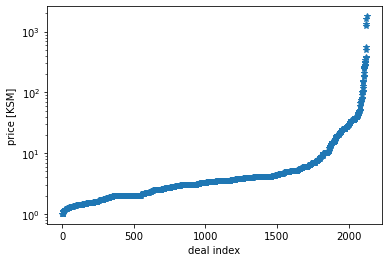

In [12]:
data_to_plot = sorted([x[2] for x in trade_events])
plt.plot(range(1, len(data_to_plot) + 1), data_to_plot, '*')
plt.yscale('log')
plt.xlabel('deal index')
plt.ylabel('price [KSM]')
plt.show()

In [13]:
bird_id_to_plot = list()
amount_to_plot = list()
date_to_plot = list()

amount_to_plot = [np.log10(x) for x in amount_to_plot]
for event in trade_events:
    bird_id_to_plot.append(event[1])
    amount_to_plot.append(event[2])
    date_to_plot.append(event[4])

Text(0.5, 0, 'bird id')

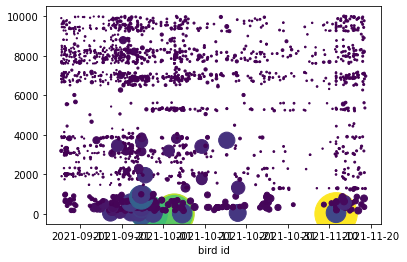

In [14]:
import matplotlib.dates as mdates

plt.scatter(date_to_plot, bird_id_to_plot, s = amount_to_plot, c = amount_to_plot)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel('date')
plt.xlabel('bird id')

Text(0.5, 0, 'bird index (non id!!!)')

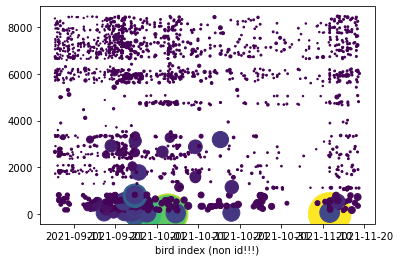

In [15]:
bird_id_to_plot = list()
amount_to_plot = list()
date_to_plot = list()

amount_to_plot = [np.log10(x) for x in amount_to_plot]
for event in trade_events:
    bird_id_to_plot.append(event[0])
    amount_to_plot.append(event[2])
    date_to_plot.append(event[4])
    
import matplotlib.dates as mdates

plt.scatter(date_to_plot, bird_id_to_plot, s = amount_to_plot, c = amount_to_plot)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xlabel('date')
plt.xlabel('bird index (non id!!!)')